In [0]:

from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('appmane').getOrCreate()
from pyspark.sql.functions import col, when, count
import pyspark.sql.functions as F
import matplotlib.pyplot as plt
import pandas as pd
df1=spark.read.csv('/FileStore/tables/AppleStore1-8.csv',header=True,inferSchema=True)
df2=spark.read.csv('/FileStore/tables/AppleStore2-6.csv',header=True,inferSchema=True)
df3=spark.read.csv('/FileStore/tables/AppleStore3-3.csv',header=True,inferSchema=True)
df4=spark.read.csv('/FileStore/tables/AppleStore4-2.csv',header=True,inferSchema=True)
columns = df1.columns

df2 = df2.select(columns)
df3 = df3.select(columns)
df4 = df4.select(columns)

merged_df = df1.union(df2).union(df3).union(df4)
merged_df.show()
     
     

+--------------------+------------+---------+--------+-----+------------+----------------+----------------+--------------------+-------+---------------+-----------------+------------+----------+---------+-------+
|            App Name|Size (bytes)|   App id|Currency|Price|Rating (All)|Rating (Current)|Avg Rating (All)|Avy Rating (Current)|Version|Rating(Content)|        Prefrence|Supp Devices|Screenshot|Supp Lang|Vpp Lic|
+--------------------+------------+---------+--------+-----+------------+----------------+----------------+--------------------+-------+---------------+-----------------+------------+----------+---------+-------+
|     PAC-MAN Premium|   100788224|281656475|     USD| 3.99|       21292|              26|             4.0|                 4.5|  6.3.5|             4+|            Games|          38|         5|       10|      1|
|Evernote - stay o...|   158578688|281796108|     USD|  0.0|      161065|              26|             4.0|                 3.5|  8.2.2|            

In [0]:
for col_name in merged_df.columns:
    print(col_name)

App Name
Size (bytes)
App id
Currency
Price
Rating (All)
Rating (Current)
Avg Rating (All)
Avy Rating (Current)
Version
Rating(Content)
Prefrence
Supp Devices
Screenshot
Supp Lang
Vpp Lic


In [0]:
merged_df.select('App Name','Rating (All)','Avg Rating (All)').describe().show()

+-------+--------------------+------------------+------------------+
|summary|            App Name|      Rating (All)|  Avg Rating (All)|
+-------+--------------------+------------------+------------------+
|  count|                7197|              7197|              7197|
|   mean|              1824.0|12892.907183548701| 3.526955675976101|
| stddev|   316.7838379715733| 75739.40867472599|1.5179475936298856|
|    min|! OH Fantastic Fr...|                 0|               0.0|
|    max|              ｗｗｗ|           2974676|               5.0|
+-------+--------------------+------------------+------------------+



In [0]:
merged_df.select('App Name','Rating (All)','Avg Rating (All)').describe().toPandas()

,summary,App Name,Rating (All),Avg Rating (All)
0,count,7197,7197,7197
1,mean,1824.0,12892.907183548701,3.526955675976101
2,stddev,316.7838379715733,75739.40867472599,1.5179475936298856
3,min,! OH Fantastic Free Kick + Kick Wall Challenge,0,0.0
4,max,ｗｗｗ,2974676,5.0


In [0]:
merged_df.show()

+--------------------+------------+---------+--------+-----+------------+----------------+----------------+--------------------+-------+---------------+-----------------+------------+----------+---------+-------+
|            App Name|Size (bytes)|   App id|Currency|Price|Rating (All)|Rating (Current)|Avg Rating (All)|Avy Rating (Current)|Version|Rating(Content)|        Prefrence|Supp Devices|Screenshot|Supp Lang|Vpp Lic|
+--------------------+------------+---------+--------+-----+------------+----------------+----------------+--------------------+-------+---------------+-----------------+------------+----------+---------+-------+
|     PAC-MAN Premium|   100788224|281656475|     USD| 3.99|       21292|              26|             4.0|                 4.5|  6.3.5|             4+|            Games|          38|         5|       10|      1|
|Evernote - stay o...|   158578688|281796108|     USD|  0.0|      161065|              26|             4.0|                 3.5|  8.2.2|            

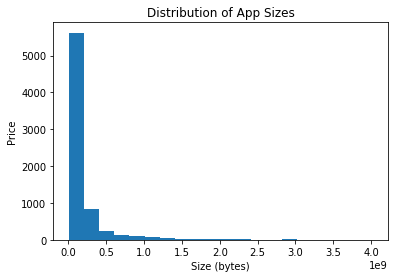

In [0]:
app_sizes = merged_df.select("Size (bytes)").rdd.flatMap(lambda x: x).collect()
plt.hist(app_sizes, bins=20)
plt.xlabel("Size (bytes)")
plt.ylabel("Price")
plt.title("Distribution of App Sizes")
plt.show()

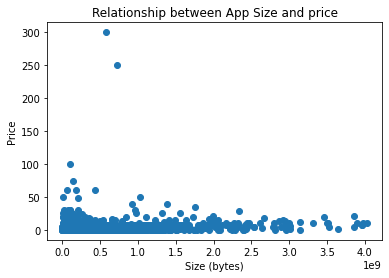

In [0]:
app_sizes = merged_df.select("Size (bytes)").rdd.flatMap(lambda x: x).collect()
price_counts = merged_df.select("Price").rdd.flatMap(lambda x: x).collect()
plt.scatter(app_sizes, price_counts)
plt.xlabel("Size (bytes)")
plt.ylabel("Price")
plt.title("Relationship between App Size and price")
plt.show()


In [0]:
merged_df.show()

+--------------------+------------+---------+--------+-----+------------+----------------+----------------+--------------------+-------+---------------+-----------------+------------+----------+---------+-------+
|            App Name|Size (bytes)|   App id|Currency|Price|Rating (All)|Rating (Current)|Avg Rating (All)|Avy Rating (Current)|Version|Rating(Content)|        Prefrence|Supp Devices|Screenshot|Supp Lang|Vpp Lic|
+--------------------+------------+---------+--------+-----+------------+----------------+----------------+--------------------+-------+---------------+-----------------+------------+----------+---------+-------+
|     PAC-MAN Premium|   100788224|281656475|     USD| 3.99|       21292|              26|             4.0|                 4.5|  6.3.5|             4+|            Games|          38|         5|       10|      1|
|Evernote - stay o...|   158578688|281796108|     USD|  0.0|      161065|              26|             4.0|                 3.5|  8.2.2|            

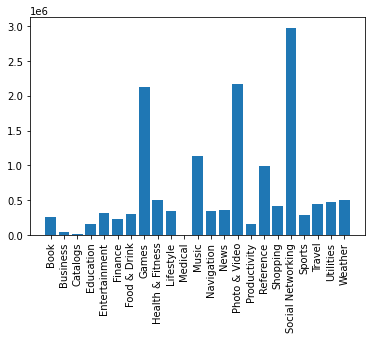

In [0]:
pdf=merged_df.toPandas()
pdf=pdf.groupby('Prefrence')['Rating (All)'].max()
pdf=pdf.reset_index()
plt.bar(pdf['Prefrence'],pdf['Rating (All)'])
plt.xticks(rotation=90)
plt.show()


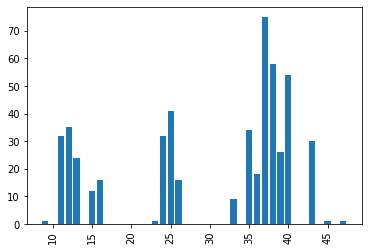

In [0]:
pdf=merged_df.toPandas()
pdf=pdf.groupby('Supp Devices')['Supp Lang'].max()
pdf=pdf.reset_index()
plt.bar(pdf['Supp Devices'],pdf['Supp Lang'])
plt.xticks(rotation=90)
plt.show()

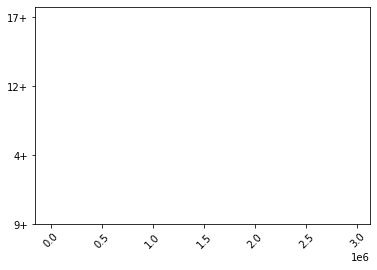

In [0]:
pdf=merged_df.toPandas()
pdf=pdf.groupby('Rating (All)')['Rating(Content)'].max()

pdf=pdf.reset_index()
plt.bar(pdf['Rating (All)'],pdf['Rating(Content)'])
plt.xticks(rotation=45)
plt.show()